In Version 2, the associations among soil, crop, and fertilizer types were explored.

The association between categorical variables was initially inspected using

pd.crosstab(df_train[col1], df_train[col2])

The pd.crosstab() function in pandas creates a contingency table (cross-tabulation) that shows frequency counts for combinations of values for two or more categorical variables.

Results from these cross-tabulations were visualized, revealing that soil, crop, and fertilizer types are distributed quite evenly. Preliminary visualizations suggested little to no association between most pairs, although there appears to be a slight sensitivity of crops to fertilizer choices.

To statistically validate these observations, both the Chi-square test and Cramér’s V were applied:

Chi-square test: Results indicated that the variables are statistically independent.

Cramér’s V: Confirmed that any association among these variables is negligible.

Conclusion of the Analysis
Because these variables are independent, predicting fertilizer choice based solely on crop or soil is not feasible with this dataset.

For those interested in learning more, my LinkedIn article, "[Data Science: Association Between Two Categorical Columns — Chi-Square Test and Cramér’s V](https://www.linkedin.com/pulse/data-science-association-between-two-categorical-columns-peichao-mi-07bhc)" explains the underlying mathematics of the Chi-square test and Cramér’s V.

References:<br>
1. dataset: [Predicting Optimal Fertilizers](https://www.kaggle.com/competitions/playground-series-s5e6/overview)<br>
2. A Comprehensive Guide to Data Exploration (https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd

df_train = pd.read_csv('/kaggle/input/playground-series-s5e6/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e6/test.csv')

In [3]:
df_train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [4]:
df_train = df_train.drop(columns=['id'])

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      750000 non-null  int64 
 1   Humidity         750000 non-null  int64 
 2   Moisture         750000 non-null  int64 
 3   Soil Type        750000 non-null  object
 4   Crop Type        750000 non-null  object
 5   Nitrogen         750000 non-null  int64 
 6   Potassium        750000 non-null  int64 
 7   Phosphorous      750000 non-null  int64 
 8   Fertilizer Name  750000 non-null  object
dtypes: int64(6), object(3)
memory usage: 51.5+ MB


In [6]:
missing_counts = df_train.isnull().sum()
print(missing_counts)

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [7]:
# Get int64 columns
int64_cols = df_train.select_dtypes(include=['int64']).columns.tolist()
df_train[int64_cols].describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [8]:
# Get categorical columns (object or category dtype)
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
df_train[cat_cols].describe()

,Soil Type,Crop Type,Fertilizer Name
count,750000,750000,750000
unique,5,11,7
top,Sandy,Paddy,14-35-14
freq,156710,85754,114436


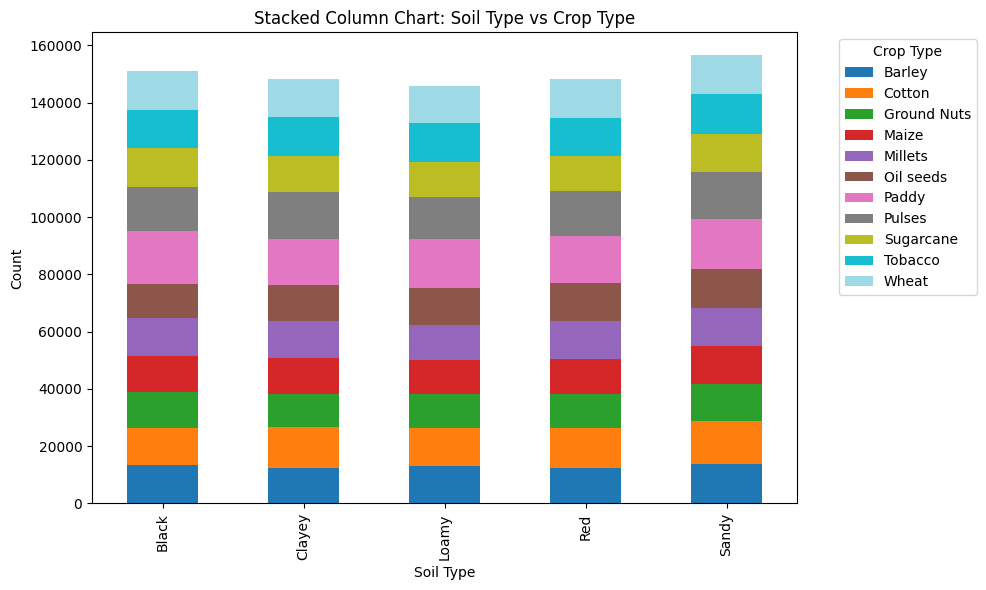

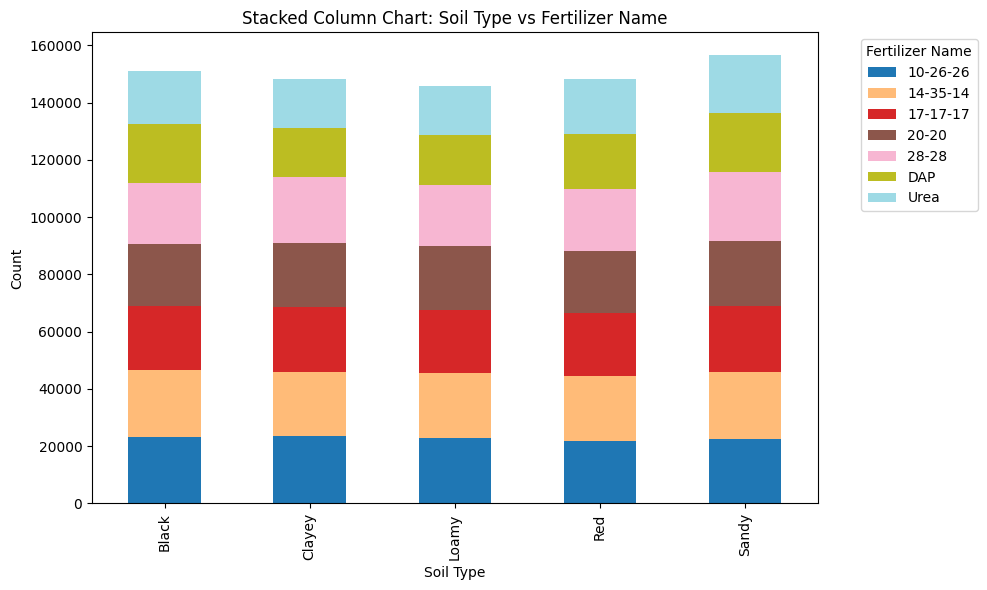

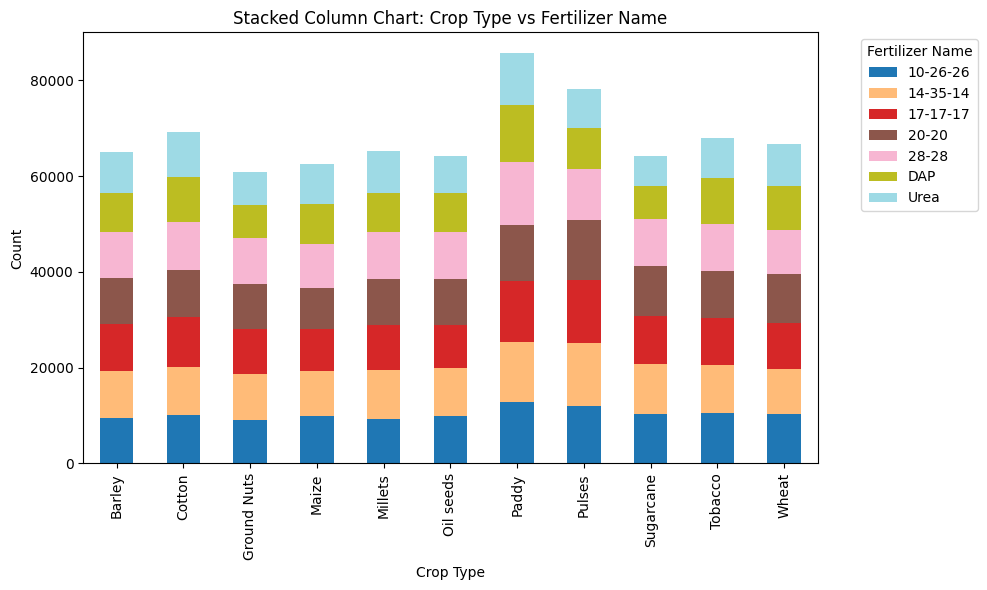

In [9]:
import matplotlib.pyplot as plt

for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        col1, col2 = cat_cols[i], cat_cols[j]
        crosstab = pd.crosstab(df_train[col1], df_train[col2])
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
        plt.title(f'Stacked Column Chart: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel('Count')
        plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

These stacked bar charts visualize the relationship between pairs of categorical variables:

- Each bar represents a category from `col1`.
- The segments within each bar show the distribution (count) of categories from `col2` within that `col1` group.
- The height of each segment indicates how many samples fall into both categories.

**What you can observe:**
- How the categories of `col2` are distributed within each category of `col1`.
- Whether certain combinations are common or rare.
- If the distribution of `col2` changes significantly across `col1` (suggesting dependence).
- Imbalances, dominance, or absence of certain category combinations.

This helps identify associations or dependencies between categorical variables.

In [10]:
from scipy.stats import chi2_contingency

for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        col1, col2 = cat_cols[i], cat_cols[j]
        contingency_table = pd.crosstab(df_train[col1], df_train[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test: {col1} vs {col2}")
        print(f"  p-value: {p:.4f}")
        if p < 0.05:
            print("  → Likely independent")
        else:
            print("  → Likely dependent")
        print()

Chi-Square Test: Soil Type vs Crop Type
  p-value: 0.0000
  → Likely independent

Chi-Square Test: Soil Type vs Fertilizer Name
  p-value: 0.0000
  → Likely independent

Chi-Square Test: Crop Type vs Fertilizer Name
  p-value: 0.0000
  → Likely independent



In [11]:
 import numpy as np

def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        col1, col2 = cat_cols[i], cat_cols[j]
        confusion_matrix = pd.crosstab(df_train[col1], df_train[col2])
        v = cramers_v(confusion_matrix)
        print(f"Cramér’s V between {col1} and {col2}: {v:.3f}")

Cramér’s V between Soil Type and Crop Type: 0.015
Cramér’s V between Soil Type and Fertilizer Name: 0.017
Cramér’s V between Crop Type and Fertilizer Name: 0.026


Cramér’s V measures the strength of association between two categorical variables, ranging from 0 (no association) to 1 (perfect association).

**How to interpret the values:**
- **0.00–0.10:** Negligible association
- **0.10–0.20:** Weak association
- **0.20–0.40:** Moderate association
- **0.40–0.60:** Relatively strong association
- **0.60–0.80:** Strong association
- **0.80–1.00:** Very strong association

**Key points:**
- Values close to 0: Variables are mostly independent.
- Values closer to 1: Stronger relationship between variables.
- There is no strict cutoff; context and domain knowledge matter.

Cramér’s V does not indicate the direction of association, only its strength.